<a href="https://colab.research.google.com/github/KommanaboyinaPraveenKumar/lab_ml/blob/main/lab4_AP23110010460.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
df= pd.read_csv("/content/DMV_Written_Tests - DMV_Written_Tests.csv")
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df.describe()

,DMV_Test_1,DMV_Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
df.isna().sum()

,0
DMV_Test_1,0
DMV_Test_2,0
Results,0


### Task 3: Visualize the Data
---

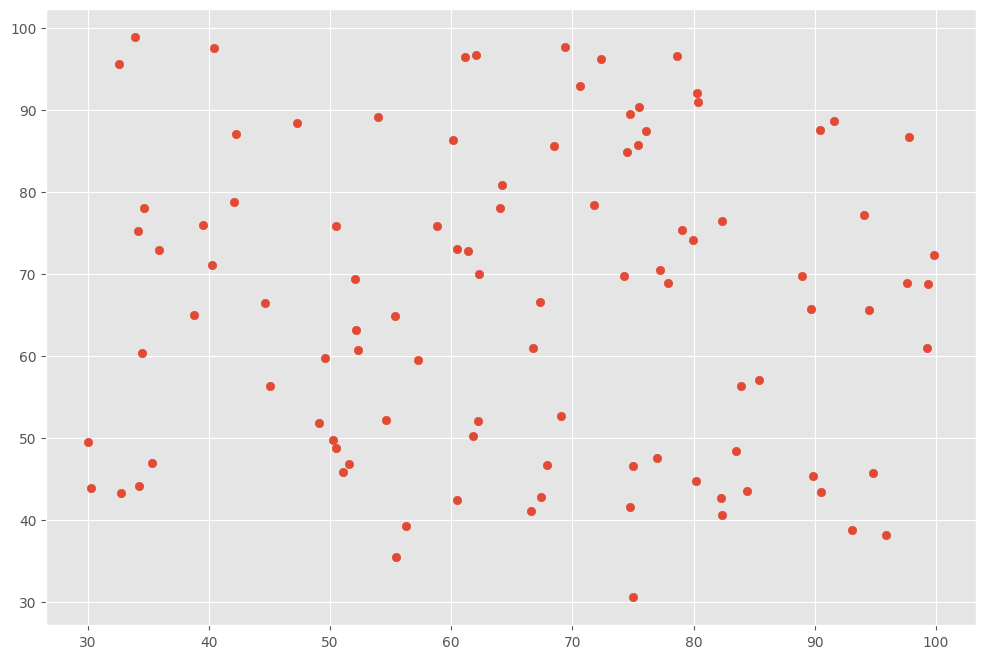

In [ ]:
plt.scatter(df['DMV_Test_1'], df['DMV_Test_2'])
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
print(sigmoid(1))

0.7310585786300049


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
import math
def cost_fun(x,y, theta):
  m=len(y)
  h=sigmoid(np.dot(x,theta))
  h = np.clip(h, 1e-15, 1 - 1e-15)
  cost=(-1/m)
  k=0
  for i in range(m):
    k+=((y[i])*math.log(h[i]))+((1-(y[i]))*math.log(1-(h[i])))
  cost*=k
  return cost
def gradient(x,y,theta):
  m=len(y)
  h=sigmoid(np.dot(x,theta))
  gradient_vector = np.dot(x.T, (h - y)) / m
  return gradient_vector

### Task 6: Cost and Gradient at Initialization
---

In [ ]:
x = np.c_[np.ones(df.shape[0]), df[['DMV_Test_1', 'DMV_Test_2']].values]
y = df['Results'].values

theta = np.zeros(x.shape[1])

initial_cost = cost_fun(x, y, theta)
initial_gradient = gradient(x, y, theta)

print(f"Initial Cost: {initial_cost}")
print(f"Initial Gradient: {initial_gradient}")

Initial Cost: 0.693147180559946
Initial Gradient: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
def gradient_descent(x, y, theta, alpha, num_iters):
  m=len(y)
  cost_log=np.zeros(num_iters)
  i=0
  while(num_iters):
    cost_log[i]=cost_fun(x, y, theta)
    theta-= alpha*gradient(x,y,theta)
    i+=1
    num_iters-=1
  return theta,cost_log



In [ ]:
x = np.c_[np.ones(df.shape[0]), df[['DMV_Test_1', 'DMV_Test_2']].values]
y = df['Results'].values

theta = np.zeros(x.shape[1])

ir=0.002
i=500000
ot,jhis=gradient_descent(x,y,theta,ir,i)
print(ot)
print(jhis)

[-16.01763158   0.13321856   0.1275004 ]
[0.69314718 1.04617284 1.35315719 ... 0.22148609 0.22148604 0.22148599]


### Task 8: Plotting the Convergence of $J(\theta)$
---

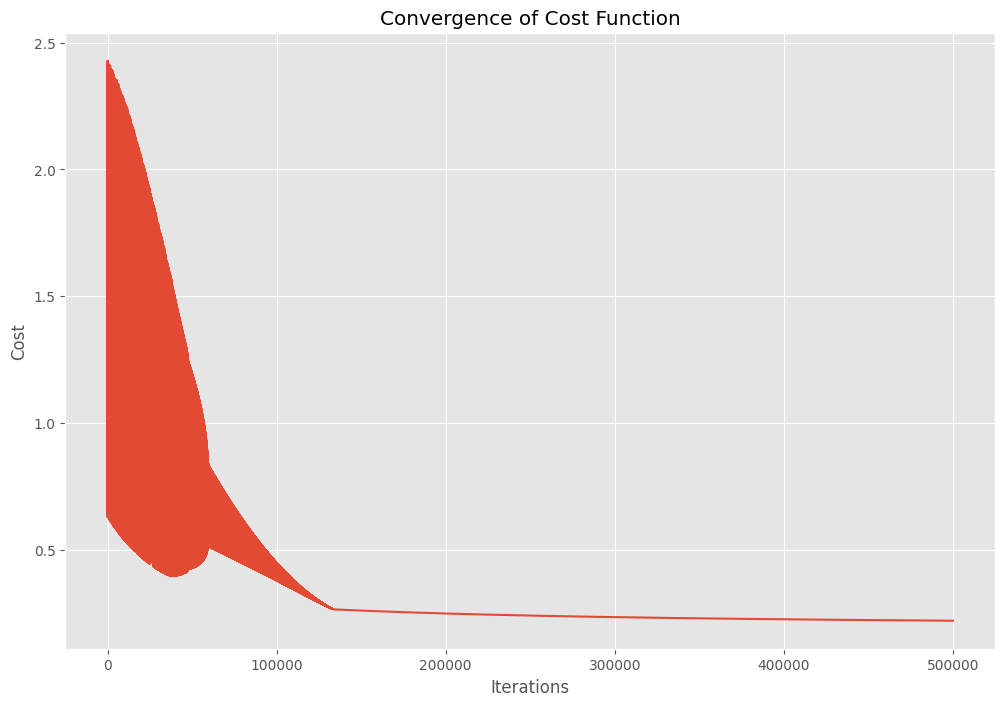

In [ ]:
plt.plot(jhis)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Cost Function")
plt.show()

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

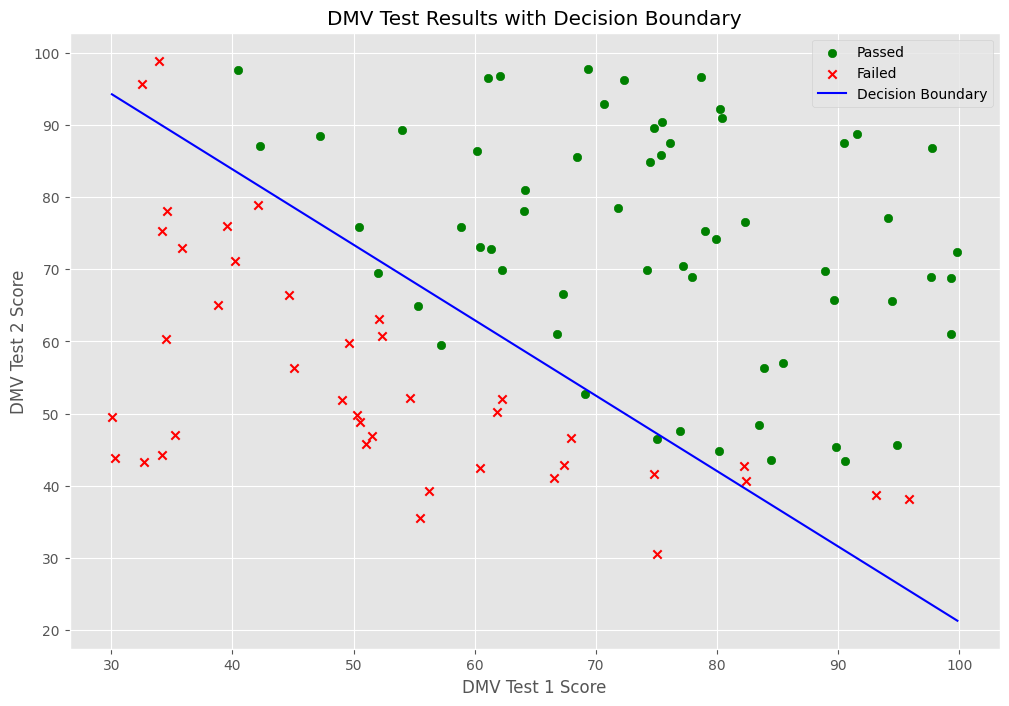

In [ ]:
passed = df[df['Results'] == 1]
failed = df[df['Results'] == 0]
plt.scatter(passed['DMV_Test_1'], passed['DMV_Test_2'], label='Passed', marker='o', c='green')
plt.scatter(failed['DMV_Test_1'], failed['DMV_Test_2'], label='Failed', marker='x', c='red')

x1_values = np.array([df['DMV_Test_1'].min(), df['DMV_Test_1'].max()])
x2_values = -(ot[0] + ot[1] * x1_values) / ot[2]
plt.plot(x1_values, x2_values, label='Decision Boundary', c='blue')

plt.xlabel('DMV Test 1 Score')
plt.ylabel('DMV Test 2 Score')
plt.title('DMV Test Results with Decision Boundary')
plt.legend()
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
def predict(x, theta):

  probability = sigmoid(np.dot(x, theta))
  return 1 if probability >= 0.5 else 0


example_input = np.array([1, 65, 75])
prediction = predict(example_input, ot)

print(f"For a student with scores 65 and 75, the predicted result is: {prediction}")

For a student with scores 65 and 75, the predicted result is: 1


In [ ]:

predictions = [predict(x[i], ot) for i in range(len(y))]

accuracy = np.mean(predictions == y)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 89.00%
